In [1]:
import numpy as np
import matplotlib.pyplot as plt
import data
import wifi_label_utils

In [2]:
filename = "data/torchsig_test/gamutrf-nz-wifi/gamutrf_ax_gain60_5180000000Hz_20480000sps.raw.sigmf-meta"


Loaded 
 Data file: data/torchsig_test/gamutrf-nz-wifi/gamutrf_ax_gain60_5180000000Hz_20480000sps.raw.sigmf-data 
 SigMF-Meta file: data/torchsig_test/gamutrf-nz-wifi/gamutrf_ax_gain60_5180000000Hz_20480000sps.raw.sigmf-meta

wifi_samples.shape=(20480000,)


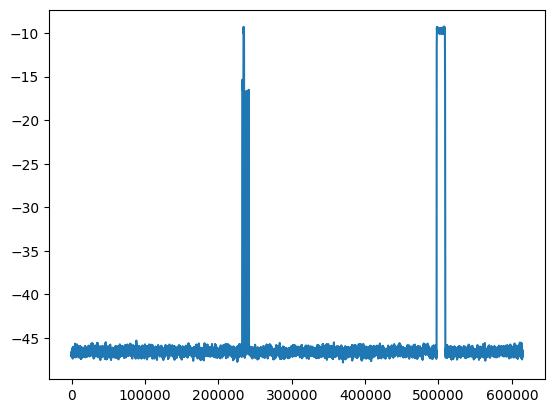

In [11]:
wifi_data = data.Data(filename)

wifi_samples = wifi_data.get_samples(n_samples=int(wifi_data.metadata["global"]["core:sample_rate"]*1))
#wifi_samples = wifi_data.get_samples()
print(f"{wifi_samples.shape=}")

wifi_avg_pwr = wifi_label_utils.moving_average(wifi_samples, 256)
wifi_avg_pwr_db = 10*np.log10(wifi_avg_pwr)

plt.figure()
plt.plot(wifi_avg_pwr_db[int(26*20480000e-2):int(29*20480000e-2)])
plt.show()





In [ ]:
wifi_data.sigmf_obj.validate()

In [ ]:
idx = wifi_label_utils.power_squelch(wifi_samples, threshold=-56, window=256)

In [ ]:
wifi_data.sigmf_obj._metadata[wifi_data.sigmf_obj.ANNOTATION_KEY] = []
for start,stop in idx:
    start, stop = int(start), int(stop)
    metadata = {
        "core:label": "anom_wifi",
        "core:freq_lower_edge": wifi_data.metadata["captures"][0]["core:frequency"] - wifi_data.metadata["global"]["core:sample_rate"]/2,
        "core:freq_upper_edge": wifi_data.metadata["captures"][0]["core:frequency"] + wifi_data.metadata["global"]["core:sample_rate"]/2,
    }
    wifi_data.sigmf_obj.add_annotation(start, length=stop-start, metadata=metadata)


In [ ]:

#wifi_data.sigmf_obj.set_global_field(wifi_data.sigmf_obj.VERSION_KEY, "1.0.0")
wifi_data.sigmf_obj.tofile(wifi_data.sigmf_meta_filename)

In [ ]:
wifi_data.sigmf_obj

In [15]:
20480000 * 0.0001

2048.0

In [13]:
1/1000

0.001